<a href="https://colab.research.google.com/github/JosePimienta/Zonas-WIFI/blob/main/Estudio_de_zonas_wifi_en_la_ciudad_de_Cartagena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade folium

Importar desde Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar librerias

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import folium
import geopandas as gpd
from tabulate import tabulate

Cargar archivo

In [125]:
#Cargar datos CSV
df = pd.read_csv("/content/drive/MyDrive/Zonas WIFI/Uso_de_Zonas_Wifi_Cartagena.csv")

# Cargar el GeoJSON con geopandas
gdf = gpd.read_file("/content/drive/MyDrive/Zonas WIFI/Barrios_de_Cartagena.geojson")

Lista de corregimientos o barrios

In [126]:
# Extraer barrios únicos
barrios_unicos = df["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
data = [[i, barrio] for i, barrio in enumerate(barrios_unicos)]

# Mostrar como tabla
print(tabulate(data, headers=["Índice", "Barrio"], tablefmt="grid"))

+----------+-------------------------+
|   Índice | Barrio                  |
+==========+=========================+
|        0 | NUEVO PARAISO           |
+----------+-------------------------+
|        1 | CIUDAD DEL BICENTENARIO |
+----------+-------------------------+
|        2 | LA BOQUILLA             |
+----------+-------------------------+
|        3 | PONTEZUELA              |
+----------+-------------------------+
|        4 | BAYUNCA                 |
+----------+-------------------------+
|        5 | CIUDADELA LA PAZ        |
+----------+-------------------------+
|        6 | COLOMBIATON             |
+----------+-------------------------+
|        7 | EL SOCORRO              |
+----------+-------------------------+
|        8 | PUNTA CANOA             |
+----------+-------------------------+
|        9 | TIERRA BOMBA            |
+----------+-------------------------+
|       10 | SAN FRANCISCO           |
+----------+-------------------------+
|       11 | EL BOSQUE   

Mapa de corregimientos o barrios de toda la ciudad

In [127]:
# Crear el mapa centrado en una ubicación
mapa_general = folium.Map(location=[10.4, -75.5], zoom_start = 12)

# Agregar cada barrio con su nombre en el tooltip
for _, barrio in gdf.iterrows():
    folium.GeoJson(
        barrio.geometry,
        tooltip = barrio["NOMBRE"]  # Clave de nombre en GeoJSON
    ).add_to(mapa_general)

# Mostrar el mapa
mapa_general

Ingreso de corregimiento o barrio

In [128]:
# Mostrar como tabla
print(tabulate(data, headers=["Índice", "Barrio"], tablefmt="grid"))

# Seleccionar barios
barrio_seleccionado = input("INGRESE UNO O MAS BARRIOS EN MAYÚSCULA SEPARADOS POR COMAS (,): ")

+----------+-------------------------+
|   Índice | Barrio                  |
+==========+=========================+
|        0 | NUEVO PARAISO           |
+----------+-------------------------+
|        1 | CIUDAD DEL BICENTENARIO |
+----------+-------------------------+
|        2 | LA BOQUILLA             |
+----------+-------------------------+
|        3 | PONTEZUELA              |
+----------+-------------------------+
|        4 | BAYUNCA                 |
+----------+-------------------------+
|        5 | CIUDADELA LA PAZ        |
+----------+-------------------------+
|        6 | COLOMBIATON             |
+----------+-------------------------+
|        7 | EL SOCORRO              |
+----------+-------------------------+
|        8 | PUNTA CANOA             |
+----------+-------------------------+
|        9 | TIERRA BOMBA            |
+----------+-------------------------+
|       10 | SAN FRANCISCO           |
+----------+-------------------------+
|       11 | EL BOSQUE   

Mapa de corregimiento o barrio seleccionado

In [129]:
# Crear el mapa centrado en Cartagena
mapa_seleccion = folium.Map(location=[10.4, -75.5], zoom_start=13)

# separar barrios por comas
barrios_seleccionados = [b.strip() for b in barrio_seleccionado.split(",")]

# Filtrar los barrios en el GeoDataFrame
barrios_filtrados = gdf[gdf["NOMBRE"].isin(barrios_seleccionados)]

# Encontrar los barrios que NO están en el GeoJSON
barrios_no_encontrados = [b for b in barrios_seleccionados if b not in barrios_filtrados["NOMBRE"].values]

# Verificar si se encontraron barrios en el GeoJSON
if not barrios_filtrados.empty:
    for _, barrio in barrios_filtrados.iterrows():
        #print(barrio_seleccionado)
        folium.GeoJson(
            barrio.geometry,
            tooltip=barrio["NOMBRE"]
        ).add_to(mapa_seleccion)

# Mostrar los barrios que no se encontraron
if barrios_no_encontrados:
    print("\nLos siguientes barrios NO fueron encontrados en el GeoJSON:")
    for barrio in barrios_no_encontrados:
        print("-", barrio)

# Mostrar el mapa
mapa_seleccion


Barrios filtrados

In [130]:
# Filtrar barrios seleccionados
df_filtrado = df[df["Corregimiento/Barrio"].isin(barrios_seleccionados)]

Barrios únicos

In [131]:
# Extraer barrios únicos
filtro_unico = df_filtrado["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
data_filtro = [[i, barrrio] for i, barrrio in enumerate(filtro_unico)]

# Mostrar como tabla
print(tabulate(data_filtro, headers=["Índice", "Barrio"], tablefmt="grid"))

+----------+--------------+
|   Índice | Barrio       |
+==========+==============+
|        0 | EL SOCORRO   |
+----------+--------------+
|        1 | LOS JARDINES |
+----------+--------------+
|        2 | LAS PALMERAS |
+----------+--------------+
|        3 | TERNERA      |
+----------+--------------+


Datos de barrios filtrados

In [134]:
df_filtrado

,Corregimiento/Barrio,Zona Wifi,Fecha,Visitas,Logins,Dispositivos Nuevos,Sesiones,Consumidores
1101,EL SOCORRO,JORGE ARTEL,2024-06-01,26,21,17,130,17.0
1102,EL SOCORRO,JORGE ARTEL,2024-06-02,32,27,14,96,13.0
1103,EL SOCORRO,JORGE ARTEL,2024-06-03,28,22,14,74,14.0
1104,EL SOCORRO,JORGE ARTEL,2024-06-04,73,63,24,393,22.0
1105,EL SOCORRO,JORGE ARTEL,2024-06-05,85,71,28,273,25.0
...,...,...,...,...,...,...,...,...
4198,TERNERA,INSPECCION DE POLICIA DE TERNERA,2024-09-26,42,40,18,332,15.0
4199,TERNERA,INSPECCION DE POLICIA DE TERNERA,2024-09-27,107,91,37,1137,34.0
4200,TERNERA,INSPECCION DE POLICIA DE TERNERA,2024-09-28,80,62,31,698,26.0
4201,TERNERA,INSPECCION DE POLICIA DE TERNERA,2024-09-29,33,24,17,207,11.0


Gráficos de nuevos dispositivos de barrios seleccionados

Ingrese el mes a consultar: 6

Gráfico para LOS JARDINES:
zona Wifi:  INSPECCION DE POLICIA ALTOS DEL JARDIN


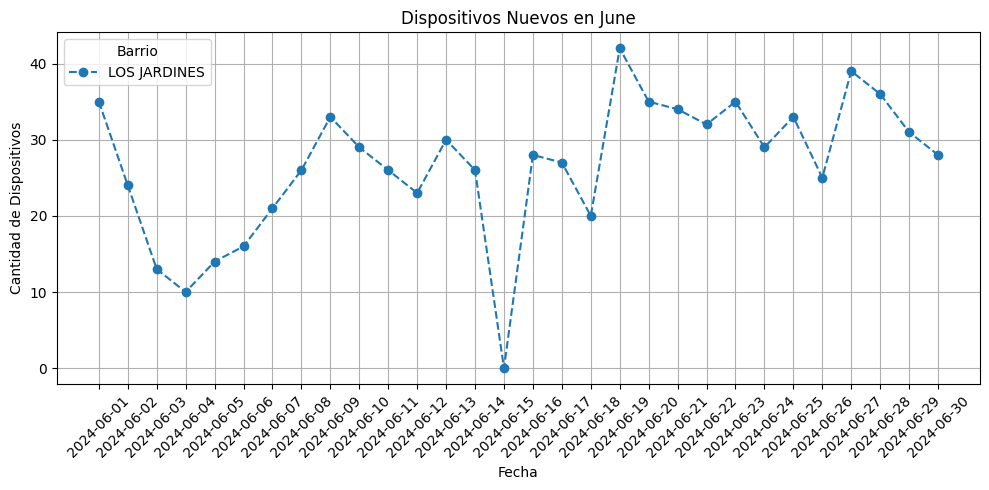


Gráfico para LAS PALMERAS:
zona Wifi:  INSPECCION DE POLICIA DE LAS PALMERAS


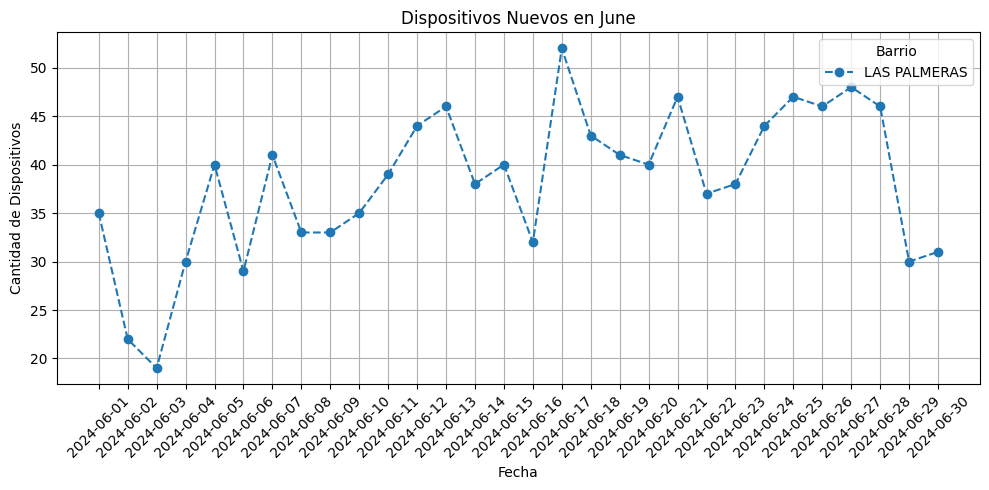


Gráfico para TERNERA:
zona Wifi:  INSPECCION DE POLICIA DE TERNERA


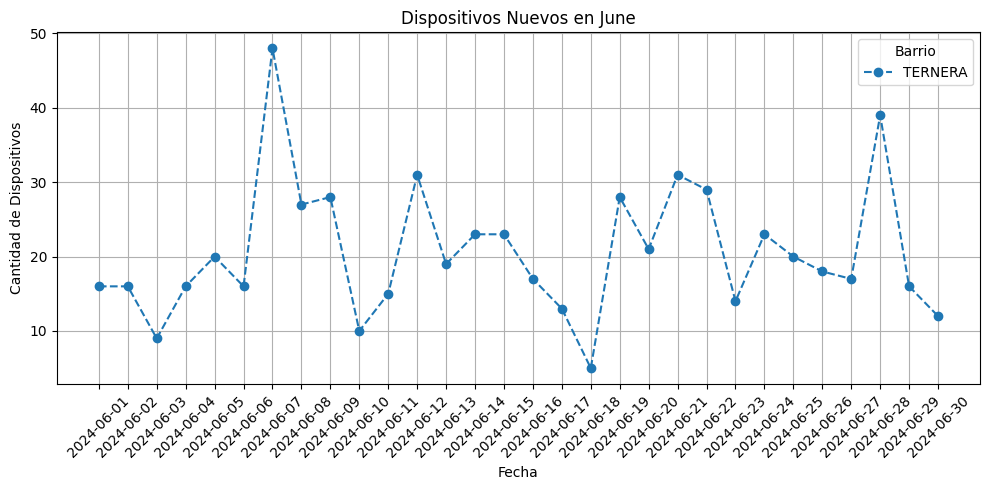


Gráfico para EL SOCORRO:
zona Wifi:  JORGE ARTEL


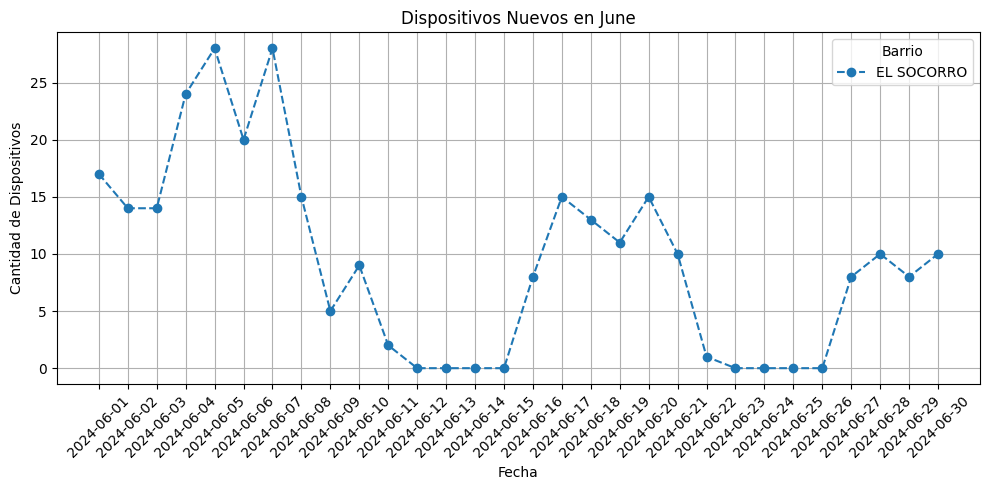

In [160]:
# Hace una copia para evitar modificar el original
df_filtrado = df_filtrado.copy()

# Convertir la columna "Fecha" a datetime
df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])

# Seleccionar mes a consultar
mes = int(input("Ingrese el mes a consultar: "))

# Seleccionar mes de conjunto de datos
df_mes = df_filtrado[df_filtrado["Fecha"].dt.month == mes]

# Mes en texto (en español)
nombre_mes = pd.to_datetime(str(mes), format='%m').strftime('%B')
#zona_wifi_ternera = df_filtrado.loc[df_filtrado["Corregimiento/Barrio"] == "LOS JARDINES", "Zona Wifi"]
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")

    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    #zona_wifi_ternera = df_filtrado.loc[df_filtrado["Corregimiento/Barrio"] == "LOS JARDINES", "Zona Wifi"]
    # Extraer barrios únicos
    filtro_unico = df_barrio['Zona Wifi'].drop_duplicates().tolist()
    print("zona Wifi: ", filtro_unico[0])
    plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Dispositivos Nuevos en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Dispositivos")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

Comparación de nuevos dispositivos en barrios seleccionados

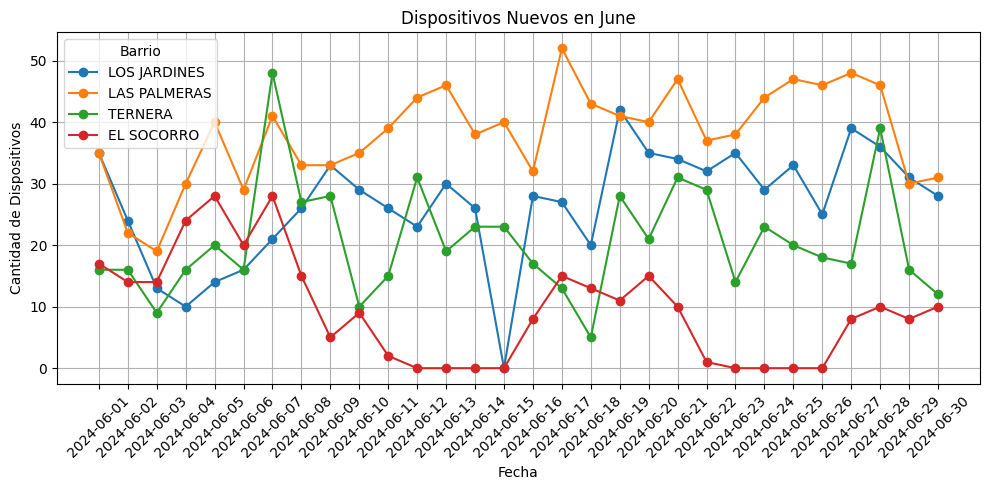

In [139]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Dispositivos Nuevos en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Dispositivos")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de Visitas


Gráfico para LOS JARDINES:


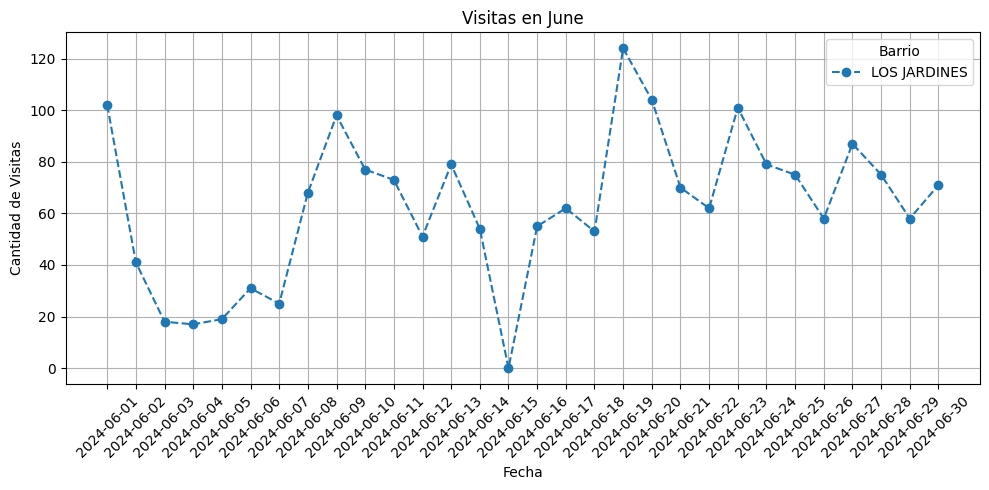


Gráfico para LAS PALMERAS:


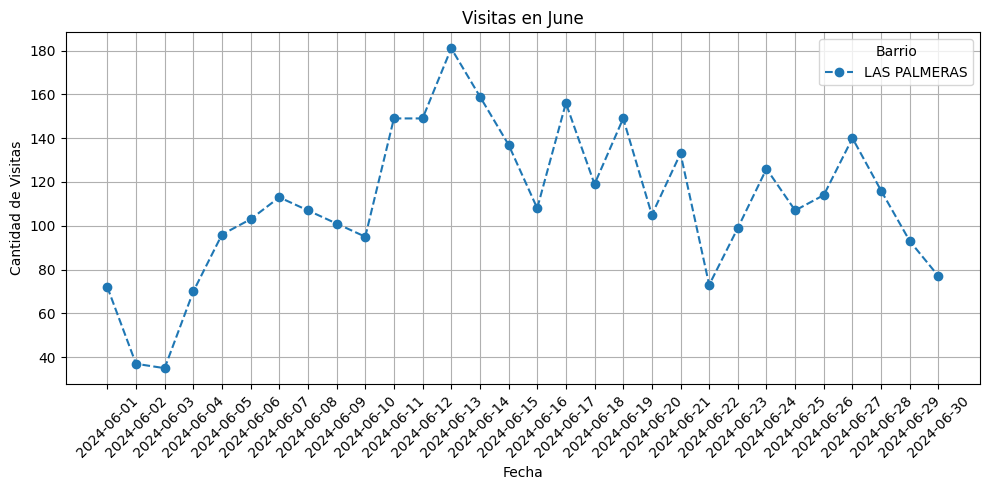


Gráfico para TERNERA:


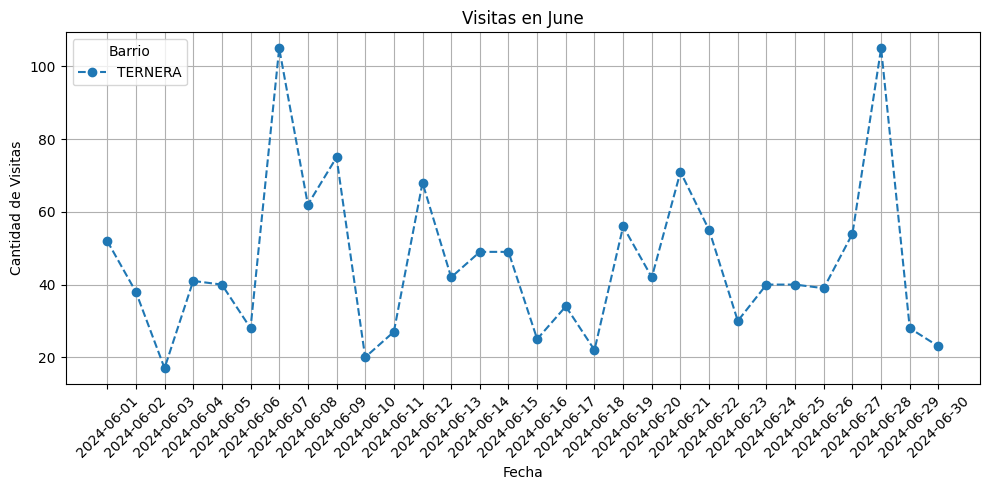


Gráfico para EL SOCORRO:


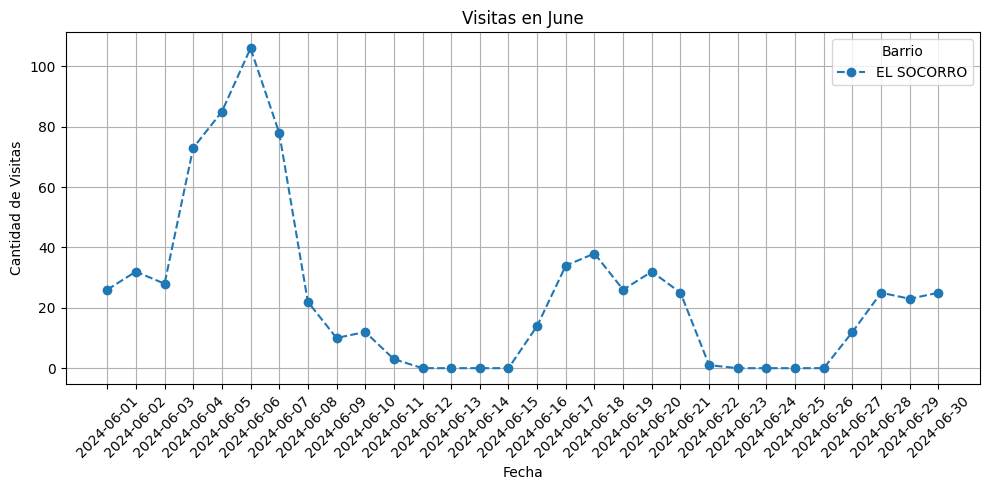

In [162]:
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Visitas"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Visitas en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Visitas")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

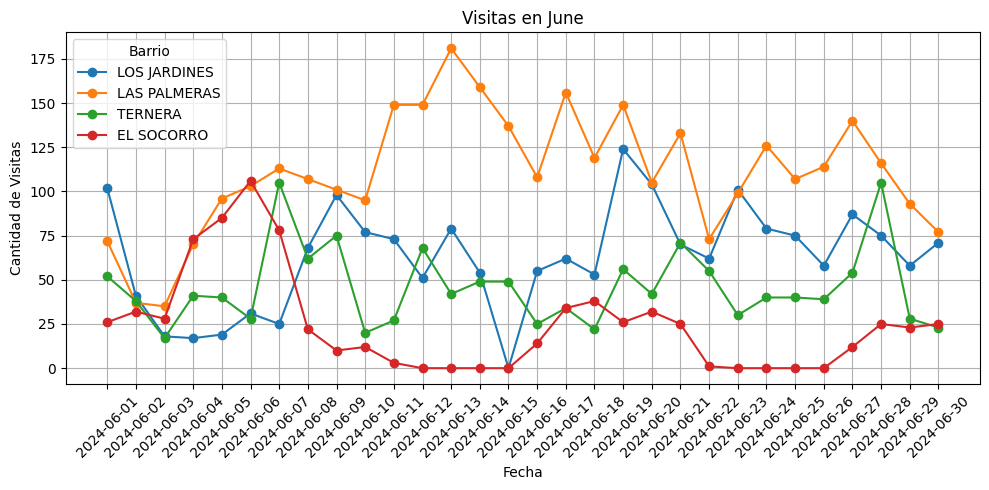

In [163]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Visitas"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Visitas en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Visitas")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de sesiones


Gráfico para LOS JARDINES:


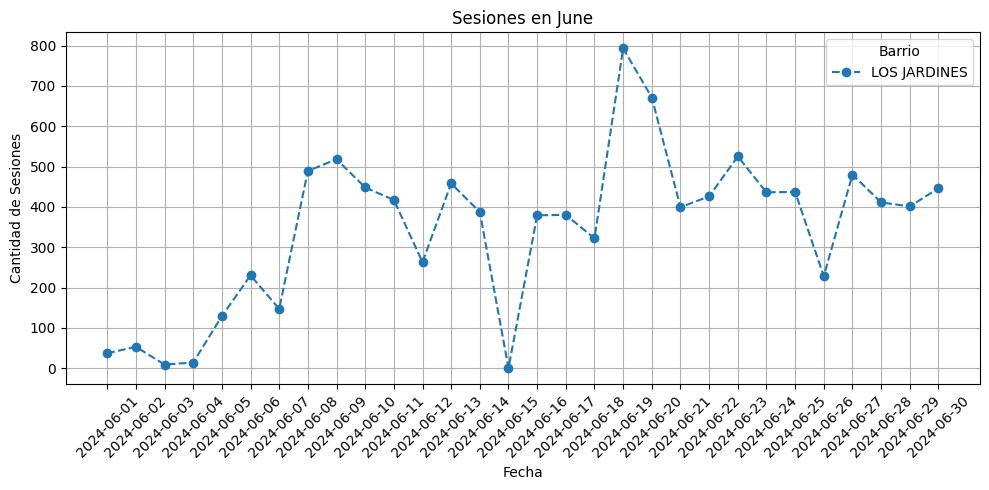


Gráfico para LAS PALMERAS:


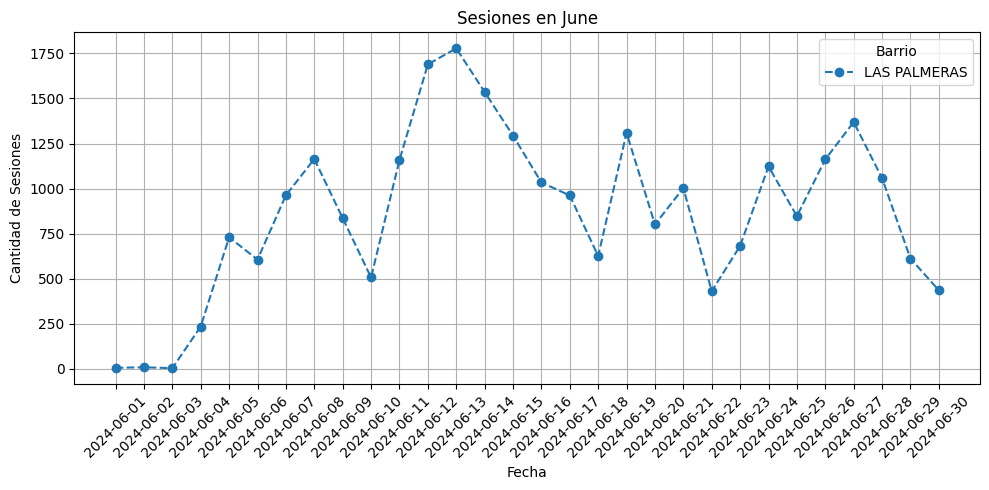


Gráfico para TERNERA:


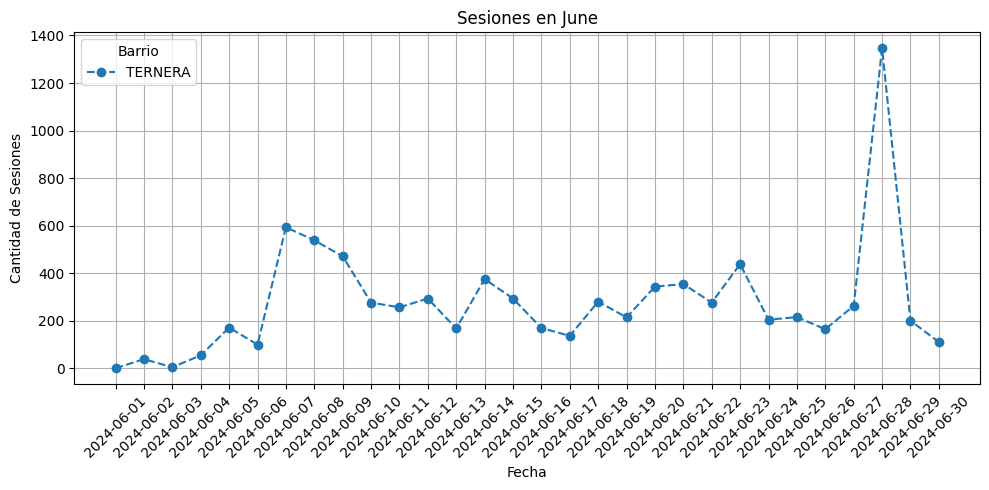


Gráfico para EL SOCORRO:


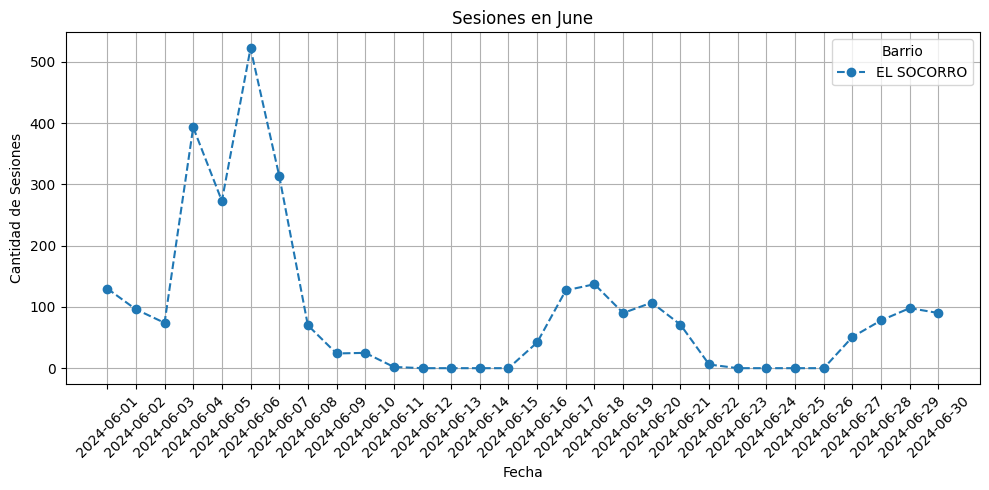

In [164]:
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Sesiones"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Sesiones en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Sesiones")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

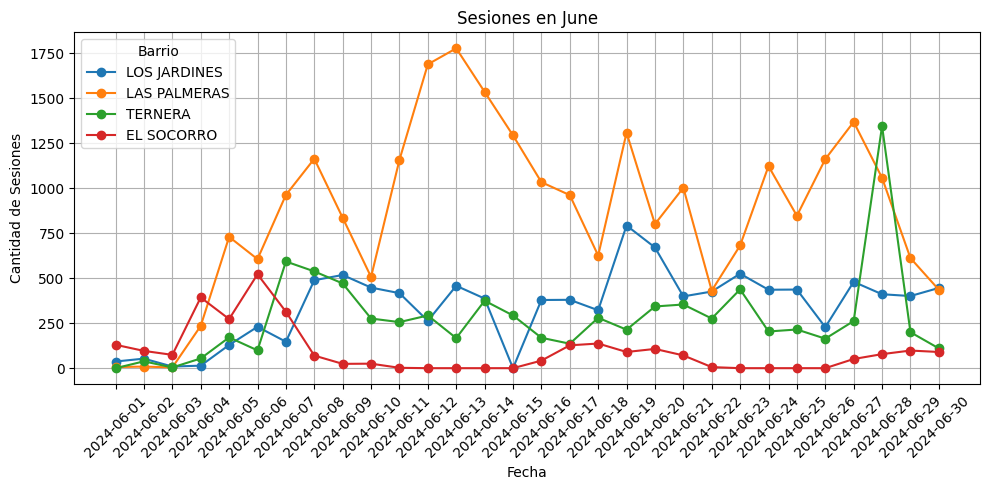

In [165]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Sesiones"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Sesiones en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Sesiones")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


In [155]:
zona_wifi_ternera = df_filtrado.loc[df_filtrado["Corregimiento/Barrio"] == "LOS JARDINES", "Zona Wifi"]

# Extraer barrios únicos
filtro_unico = zona_wifi_ternera.drop_duplicates().tolist()

# Crear datos como lista de listas
data_filtro = [[i, barrrio] for i, barrrio in enumerate(filtro_unico)]
print(data_filtro)
# Mostrar como tabla
print(tabulate(data_filtro, headers=["Índice", "Barrio"], tablefmt="grid"))


[[0, 'INSPECCION DE POLICIA ALTOS DEL JARDIN']]
+----------+----------------------------------------+
|   Índice | Barrio                                 |
+==========+========================================+
|        0 | INSPECCION DE POLICIA ALTOS DEL JARDIN |
+----------+----------------------------------------+


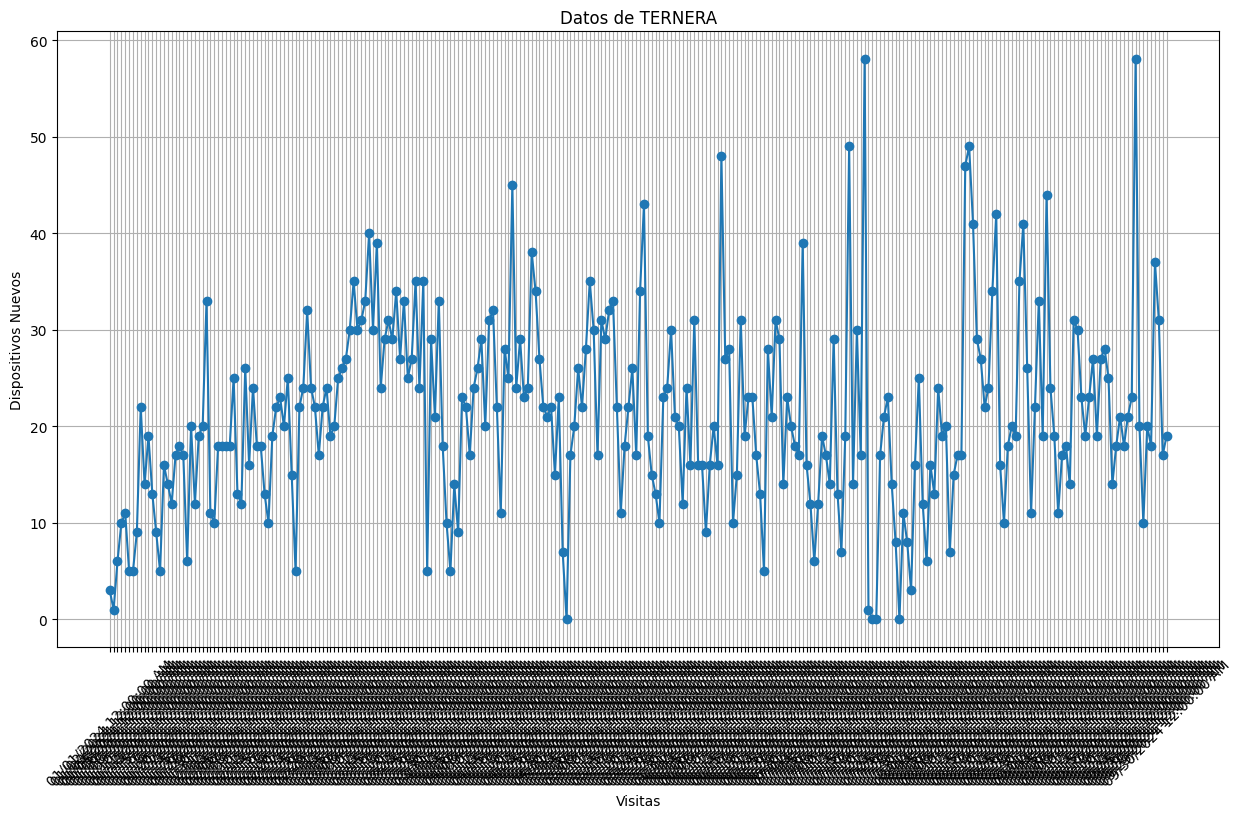

In [76]:
# Filtrar los datos donde la columna NOMBRE tenga el valor deseado
nombre_filtrado = "TERNERA"
df_filtrado = df[df["Corregimiento/Barrio"] == nombre_filtrado]

# Verificar si hay datos después del filtro
if df_filtrado.empty:
    print(f"No hay datos para '{nombre_filtrado}'.")
else:
    # Crear el gráfico (ejemplo: gráfico de líneas)
    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado["Fecha"], df_filtrado["Dispositivos Nuevos"], marker='o', linestyle='-')
    #df_filtrado['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_filtrado}")
    plt.xlabel("Visitas")
    plt.ylabel("Dispositivos Nuevos")
    plt.xticks(rotation=45)
    plt.grid()

    # Mostrar el gráfico
    plt.show()


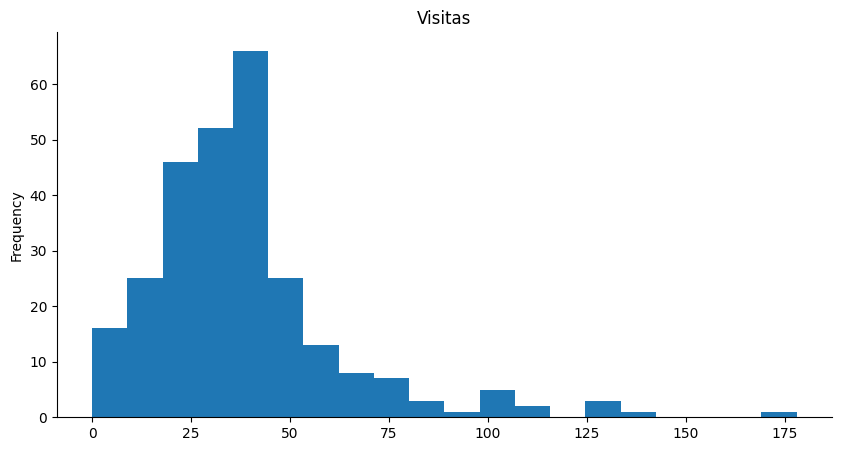

In [ ]:
df_filtrado['Visitas'].plot(kind='hist', bins=20, title='Visitas')
plt.gca().spines[['top', 'right']].set_visible(False)

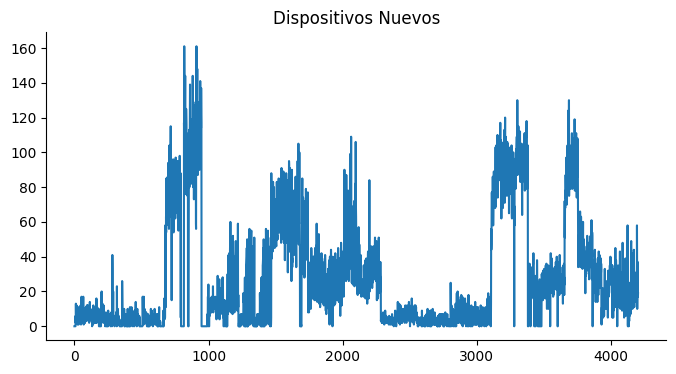

In [ ]:
# @title Dispositivos Nuevos

from matplotlib import pyplot as plt
df['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')
plt.gca().spines[['top', 'right']].set_visible(False)

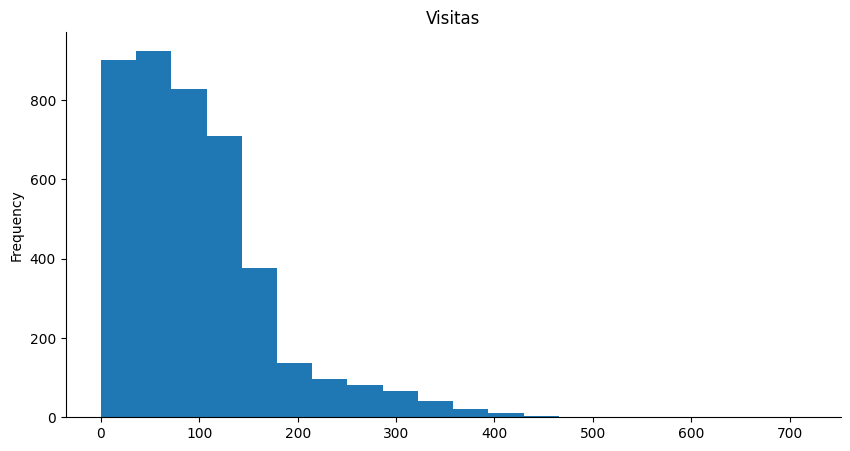

In [ ]:
# @title Visitas

from matplotlib import pyplot as plt
df['Visitas'].plot(kind='hist', bins=20, title='Visitas')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Dispositivos Nuevos'}>

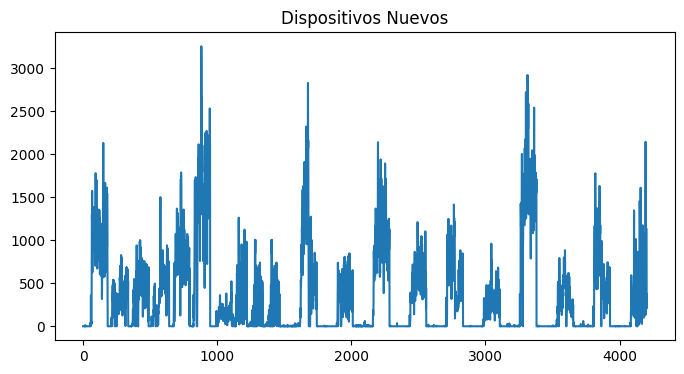

In [ ]:
df['Sesiones'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

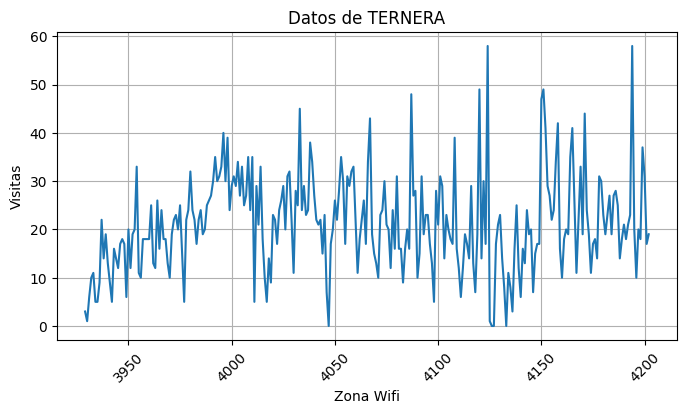

In [77]:
# Filtrar los datos donde la columna NOMBRE tenga el valor deseado
nombre_filtrado = "TERNERA"
df_filtrado = df[df["Corregimiento/Barrio"] == nombre_filtrado]

# Verificar si hay datos después del filtro
if df_filtrado.empty:
    print(f"No hay datos para '{nombre_filtrado}'.")
else:
    # Crear el gráfico (ejemplo: gráfico de líneas)
    plt.figure(figsize=(8, 8))
    #plt.plot(df_filtrado["Visitas"], df_filtrado["Logins"], marker='o', linestyle='-')
    df_filtrado['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_filtrado}")
    plt.xlabel("Zona Wifi")
    plt.ylabel("Visitas")
    plt.xticks(rotation=45)
    plt.grid()

    # Mostrar el gráfico
    plt.show()


In [148]:
df

,Corregimiento/Barrio,Zona Wifi,Fecha,Visitas,Logins,Dispositivos Nuevos,Sesiones,Consumidores
0,NUEVO PARAISO,BIBLIOTECA NUEVO PARAISO,04/01/2024 12:00:00 AM,0,0,0,0,0.0
1,NUEVO PARAISO,BIBLIOTECA NUEVO PARAISO,04/02/2024 12:00:00 AM,0,0,0,0,0.0
2,NUEVO PARAISO,BIBLIOTECA NUEVO PARAISO,04/03/2024 12:00:00 AM,0,0,0,0,0.0
3,NUEVO PARAISO,BIBLIOTECA NUEVO PARAISO,04/04/2024 12:00:00 AM,0,0,0,0,0.0
4,NUEVO PARAISO,BIBLIOTECA NUEVO PARAISO,04/05/2024 12:00:00 AM,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
4198,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/26/2024 12:00:00 AM,42,40,18,332,15.0
4199,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/27/2024 12:00:00 AM,107,91,37,1137,34.0
4200,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/28/2024 12:00:00 AM,80,62,31,698,26.0
4201,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/29/2024 12:00:00 AM,33,24,17,207,11.0
